In [176]:
#데이터 로드
# sales1 = pd.read_csv('add_variable.csv', encoding='euc-kr' )
# sales2 = pd.read_csv("sales2.csv", encoding='euc-kr' )
# apt_rate = pd.read_csv("apt_rate.csv", encoding='euc-kr')
# b_income = pd.read_csv("b_income.csv", encoding='euc-kr')
# store_num = pd.read_csv("store_num.csv", encoding='euc-kr')

In [177]:
sales2.columns= ['기준_년_코드', '기준_분기_코드', '상권_코드', '서비스_업종_코드', '당월_매출_금액', 'day/weekend',
       'female/male', '2030_rate', '06~11rate', '11~14rate', '14~17rate',
       '17~21rate', '21~24rate', '2030_rate', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '월_평균_소득_금액', '지출_총금액', 'sales_total']

In [178]:
sales2['sales/total']= sales2['당월_매출_금액']/ sales2['sales_total']
sales2.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '서비스_업종_코드', '당월_매출_금액', 'day/weekend',
       'female/male', '2030_rate', '06~11rate', '11~14rate', '14~17rate',
       '17~21rate', '21~24rate', '2030_rate', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '월_평균_소득_금액', '지출_총금액', 'sales_total', 'sales/total'],
      dtype='object')

In [179]:
sales2 =sales2[['기준_년_코드', '기준_분기_코드', '상권_코드', '서비스_업종_코드', '당월_매출_금액', 'day/weekend',
       'female/male', '2030_rate', '06~11rate', '11~14rate', '14~17rate',
       '17~21rate', '21~24rate', '2030_rate', '아파트_단지_수', '아파트_평균_면적',
       '아파트_평균_시가', '월_평균_소득_금액', '지출_총금액', 'sales/total']]

In [180]:
# 점포수 merge
sales3=pd.merge(sales2,store_num, on=['기준_분기_코드', '상권_코드','서비스_업종_코드','당월_매출_금액'])
sales3['매출/점포']= sales3['당월_매출_금액']/sales3['점포수']

In [181]:
sales3.to_csv("add_variable2.csv", sep=",", encoding = 'euc-kr', index=False)

## 여기부터 시작해주세요!

In [287]:
df = pd.read_csv('add_variable2.csv', encoding='euc-kr' )

### inf, NAN값 없애기

In [244]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [245]:
def make_nan(x):
    if x==0:
        return np.nan
    else :
        return x
    
for col in df.columns :
    df[col] = df[col].apply(make_nan)

In [246]:
#nan값이 하나라도 있는 행은 없애기
import missingno as msno
df=df.dropna(axis=0)
# msno.bar(df)
# plt.show()

In [247]:
# 데이터가 80% 이상 있는열만 남김
df = df.dropna(thresh=int(len(df) * 0.8), axis=1)
# msno.matrix(df)
# plt.show()

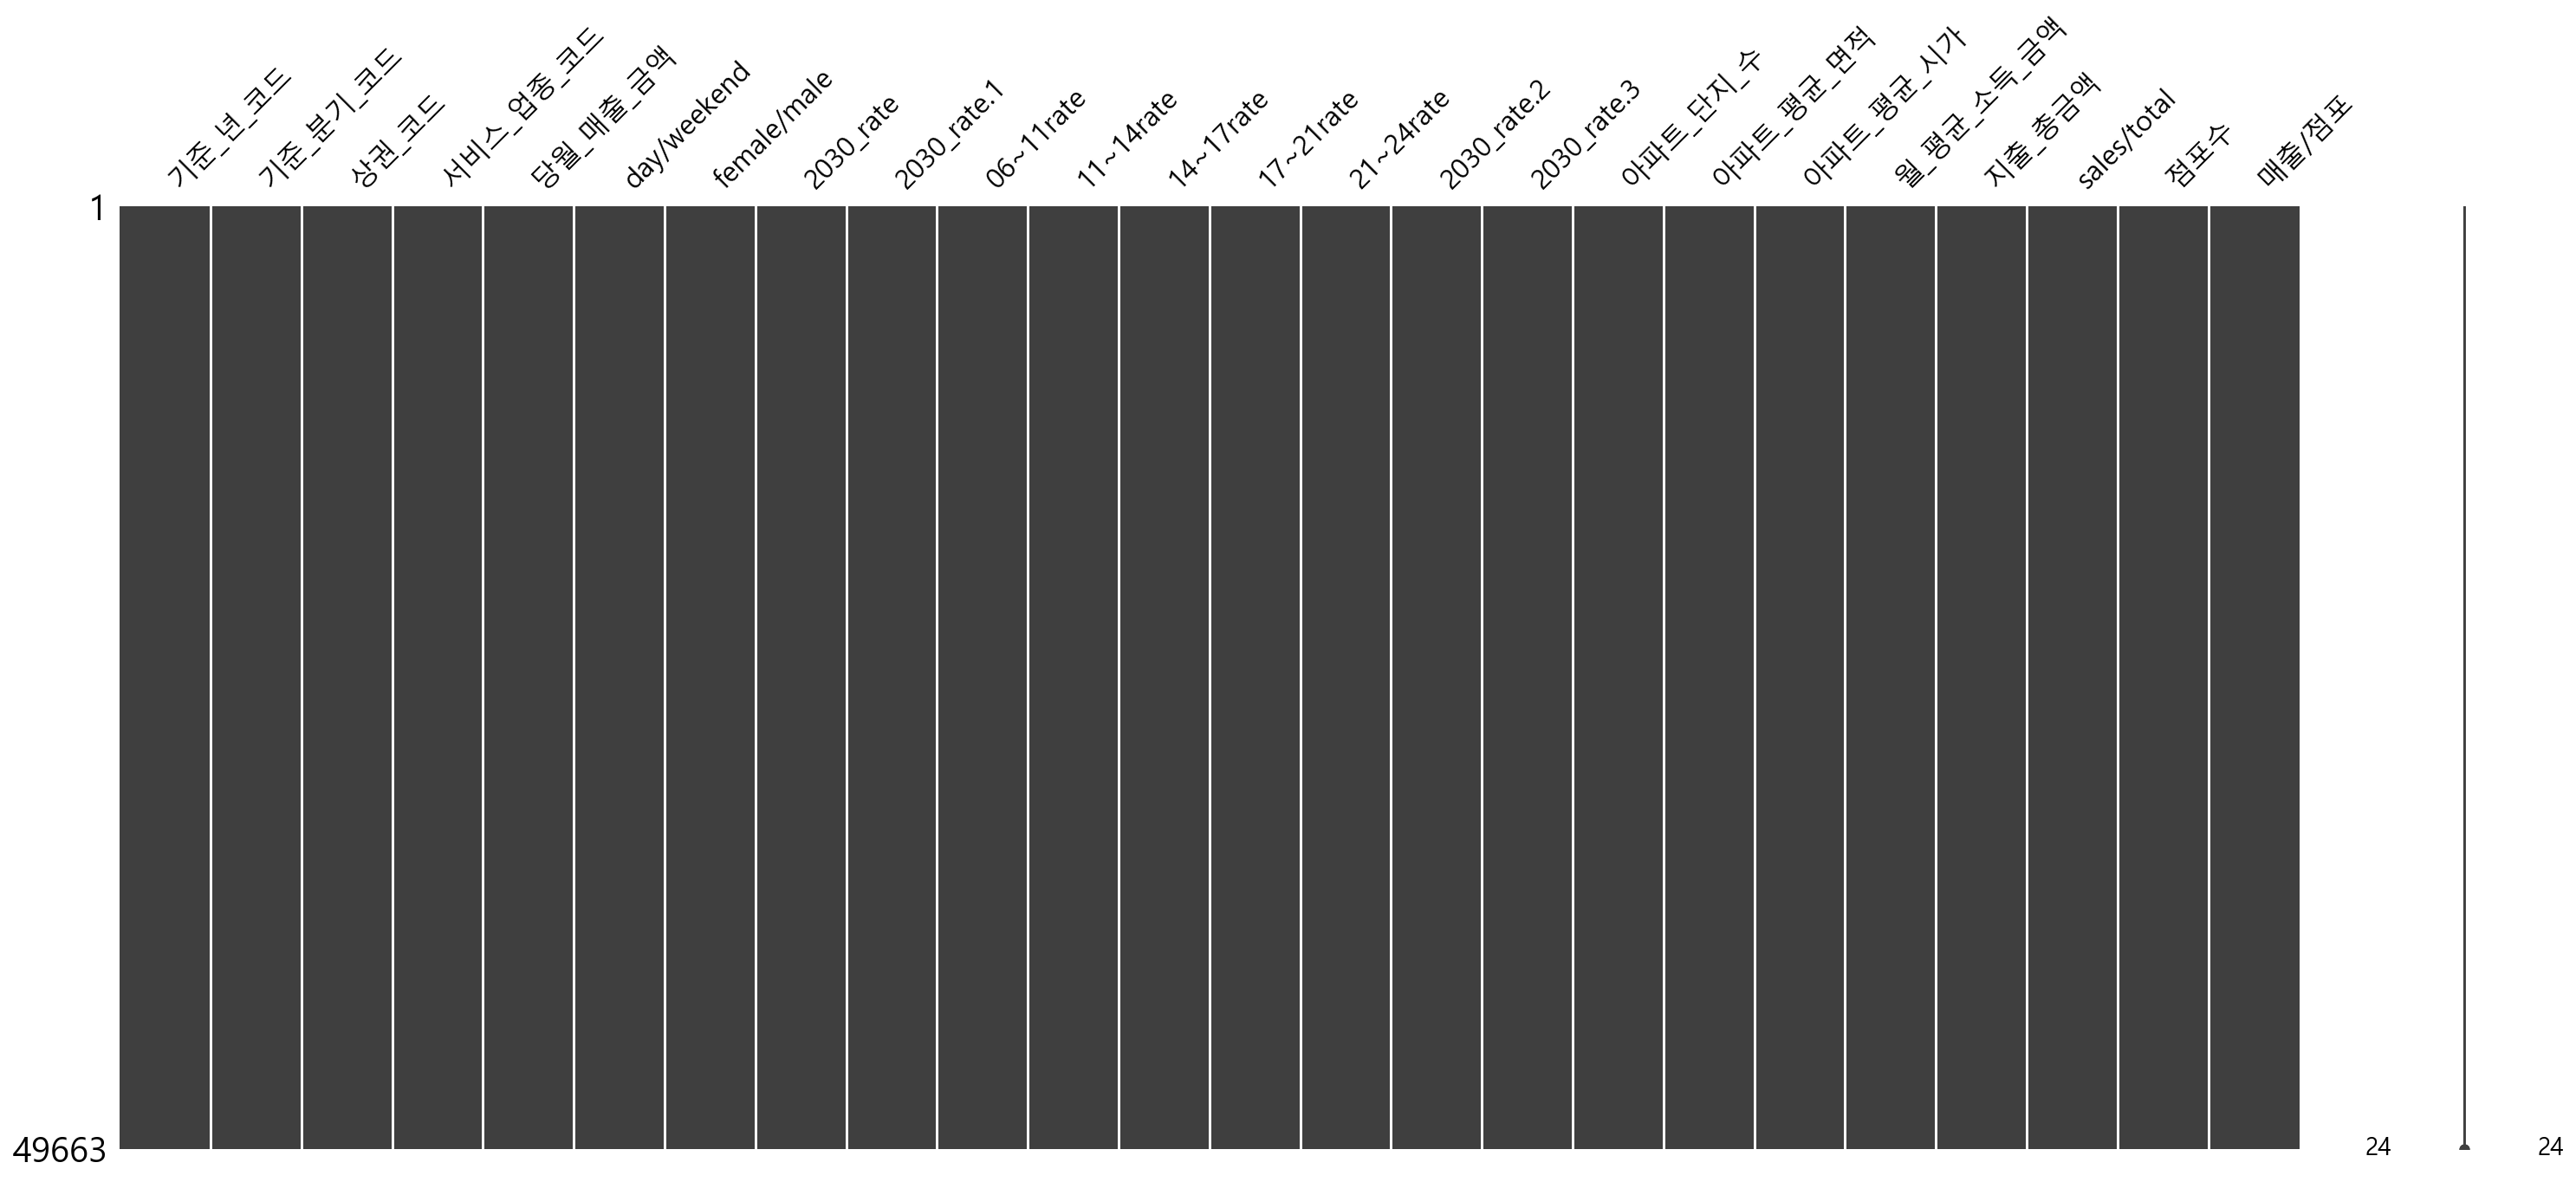

In [248]:
import missingno as msno
msno.matrix(df)
plt.show()

In [249]:
#inf가 있는 행 제외
import math
for col in df.columns :
    df=df[df[col]!=math.inf]
# df.tail()

In [250]:
# df.to_csv("add_variable3.csv", sep=",", encoding = 'euc-kr', index=False)

In [288]:
df = pd.read_csv('add_variable3.csv', encoding='euc-kr' )

### 상관관계 분석

In [289]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', 'Code', 'ServiceCode', 'TotalSales',
       'DayWeekend', 'FemaleMale', '2030rate', '0611rate', '1114rate',
       '1417rate', '1721rate', '2124rate', 'AptNum', 'AptArea', 'AptPrice',
       'MonthlyIncome', 'Consume', 'ServiceSale', 'StoreNum', 'SalesPerStore'],
      dtype='object')

In [290]:
# df = pd.read_csv('add_variable3.csv', encoding='euc-kr' )
df1=df[['SalesPerStore','DayWeekend', 'FemaleMale', '2030rate', '0611rate', '1114rate',
       '1417rate', '1721rate', '2124rate', 'AptNum', 'AptArea', 'AptPrice',
       'MonthlyIncome', 'Consume', 'ServiceSale', 'StoreNum']]

In [313]:
df2=df
df2.columns

Index(['기준_년_코드', '기준_분기_코드', 'Code', 'ServiceCode', 'TotalSales',
       'DayWeekend', 'FemaleMale', '2030rate', '0611rate', '1114rate',
       '1417rate', '1721rate', '2124rate', 'AptNum', 'AptArea', 'AptPrice',
       'MonthlyIncome', 'Consume', 'ServiceSale', 'StoreNum', 'SalesPerStore'],
      dtype='object')

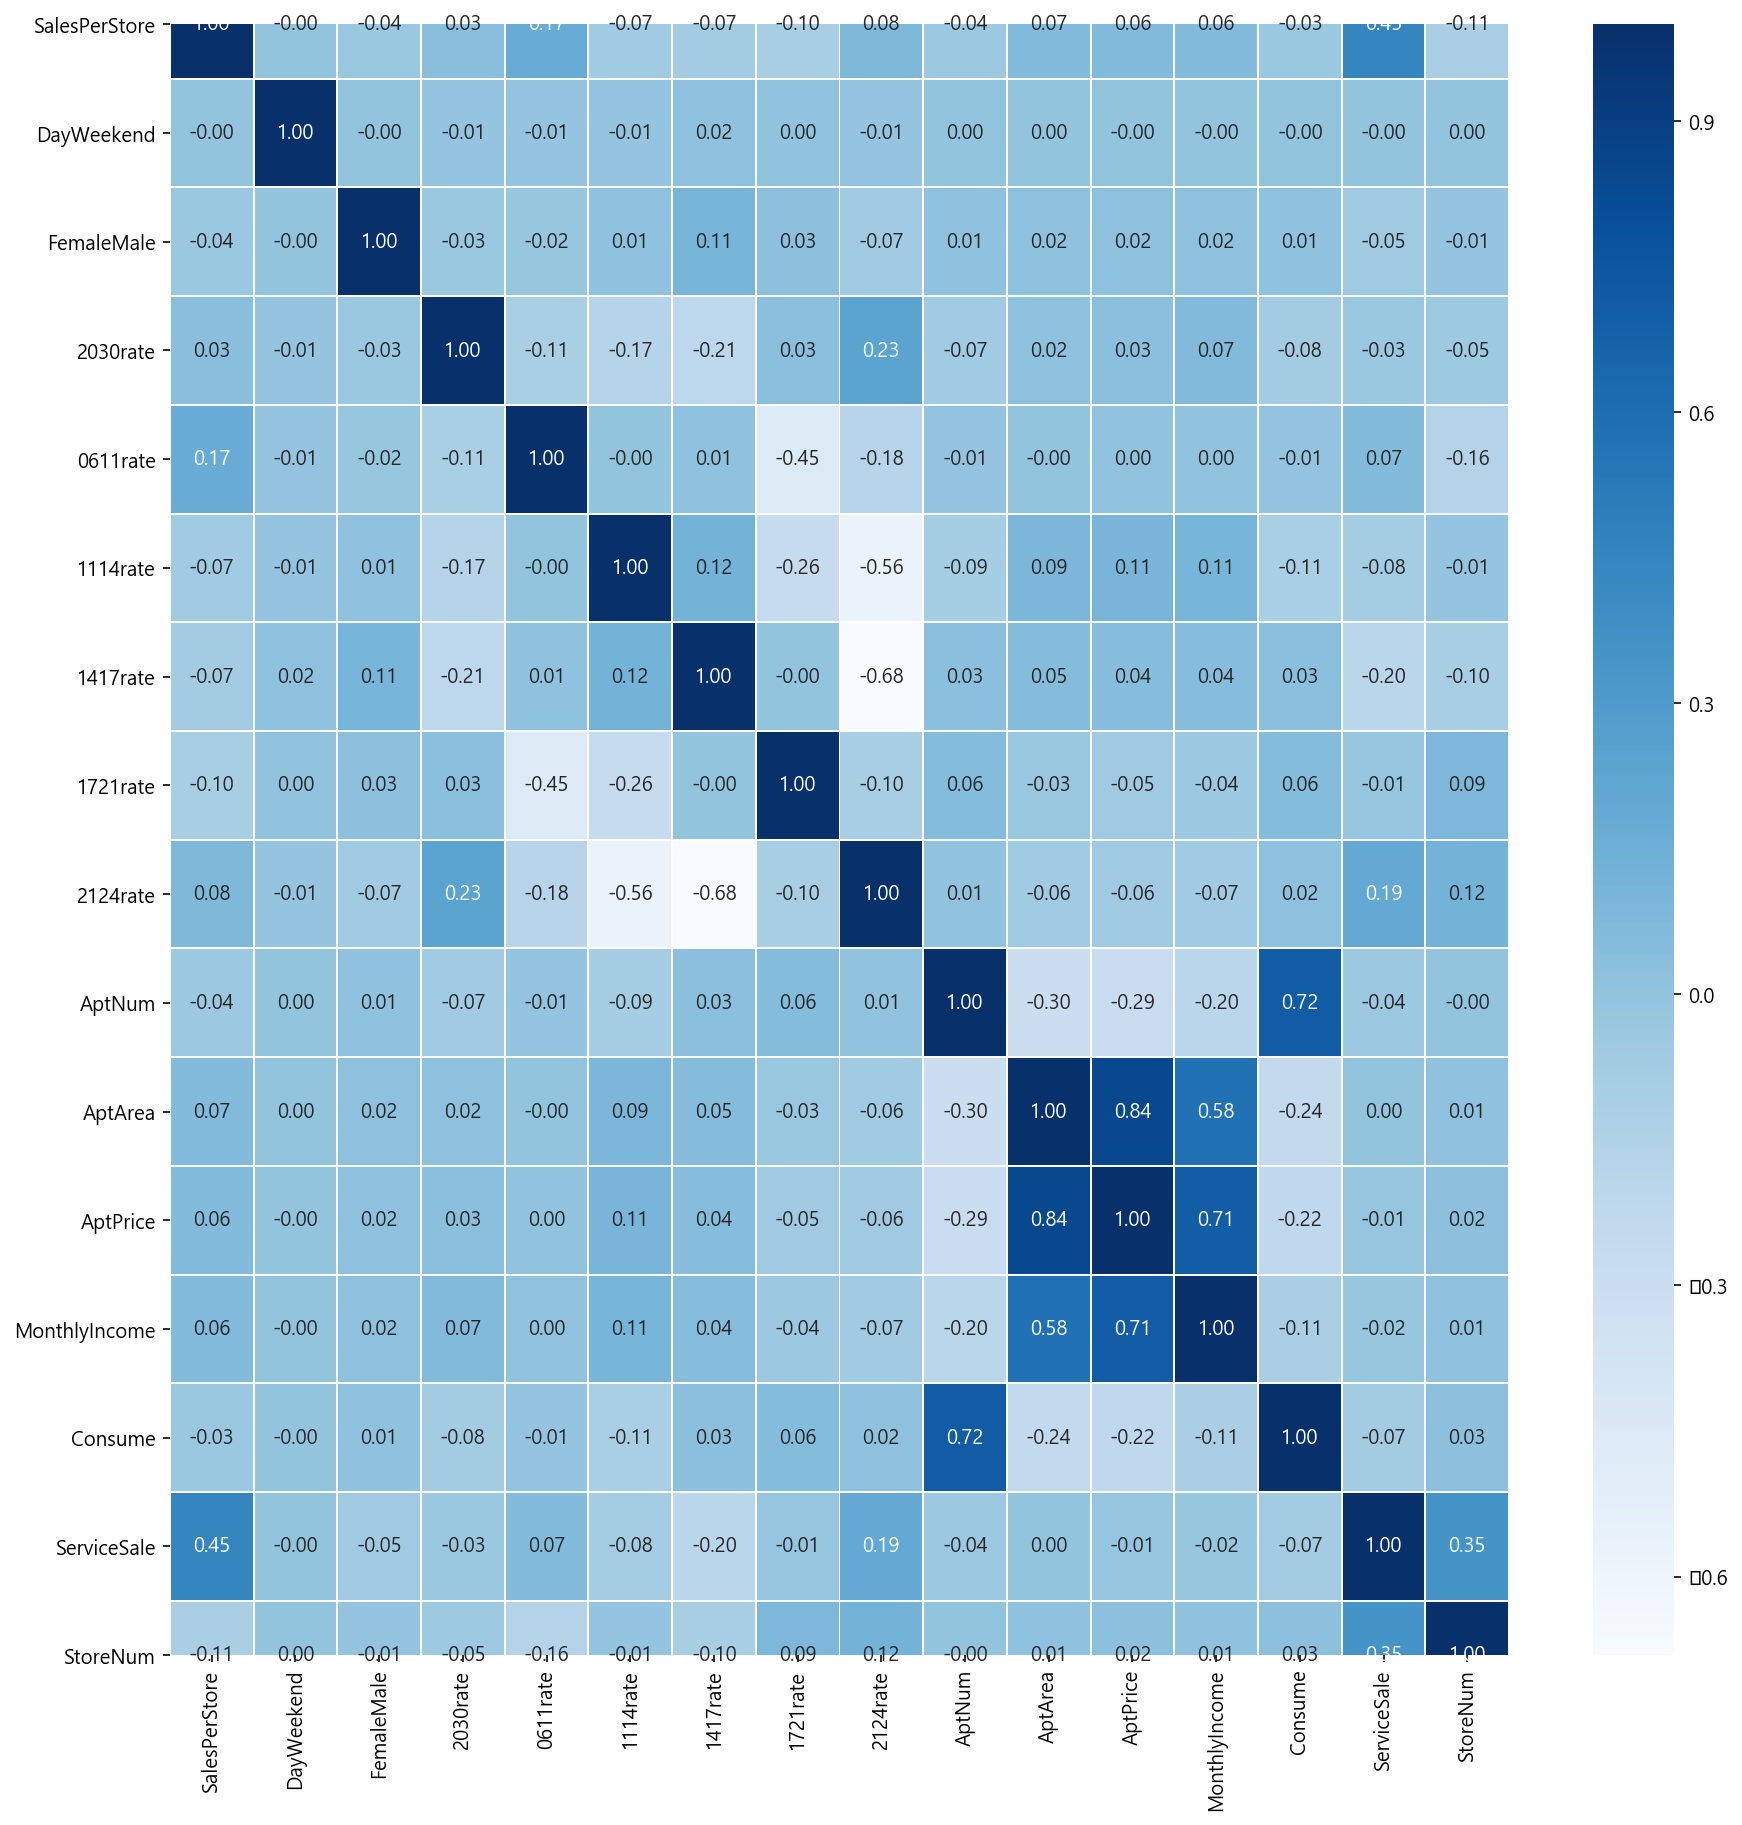

In [291]:
#상관관계 분석
# 점포당 매출액과 큰 상관관계를 가지는 변수를 찾기 어렵다
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
# sns.heatmap(data = df2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

### 부분회귀분석

In [296]:
df1.columns=['SalesPerStore', 'DayWeekend', 'FemaleMale', 'TwentyThirty', 'SixToEleven',
       'ElevenFourteen', 'FourSeventeen', 'Seventeen21', 'Twentyone24', 'AptNum', 'AptArea',
       'AptPrice', 'MonthlyIncome', 'Consume', 'ServiceSale', 'StoreNum']
# "매출_점포 ~"+" + ".join(df1.columns[4:])

In [297]:
"SalesPerStore ~ "+" + ".join(df1.columns[1:])

'SalesPerStore ~ DayWeekend + FemaleMale + TwentyThirty + SixToEleven + ElevenFourteen + FourSeventeen + Seventeen21 + Twentyone24 + AptNum + AptArea + AptPrice + MonthlyIncome + Consume + ServiceSale + StoreNum'

In [282]:
# model= sm.OLS.from_formula("SalesPerStore ~ DayWeekend", data=df1)
# result =  model.fit()
# fig = plt.figure(figsize=(8, 20))
# sm.graphics.plot_partregress_grid(df1, fig=fig)
# fig.suptitle("")
# plt.show()

In [307]:
model= sm.OLS.from_formula("SalesPerStore ~ np.log(DayWeekend)+np.log(FemaleMale)+"+" + ".join(df1.columns[3:]), data=df1)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerStore   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1479.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:48:16   Log-Likelihood:            -9.7875e+05
No. Observations:               49410   AIC:                         1.958e+06
Df Residuals:                   49394   BIC:                         1.958e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.754e+07   7.99

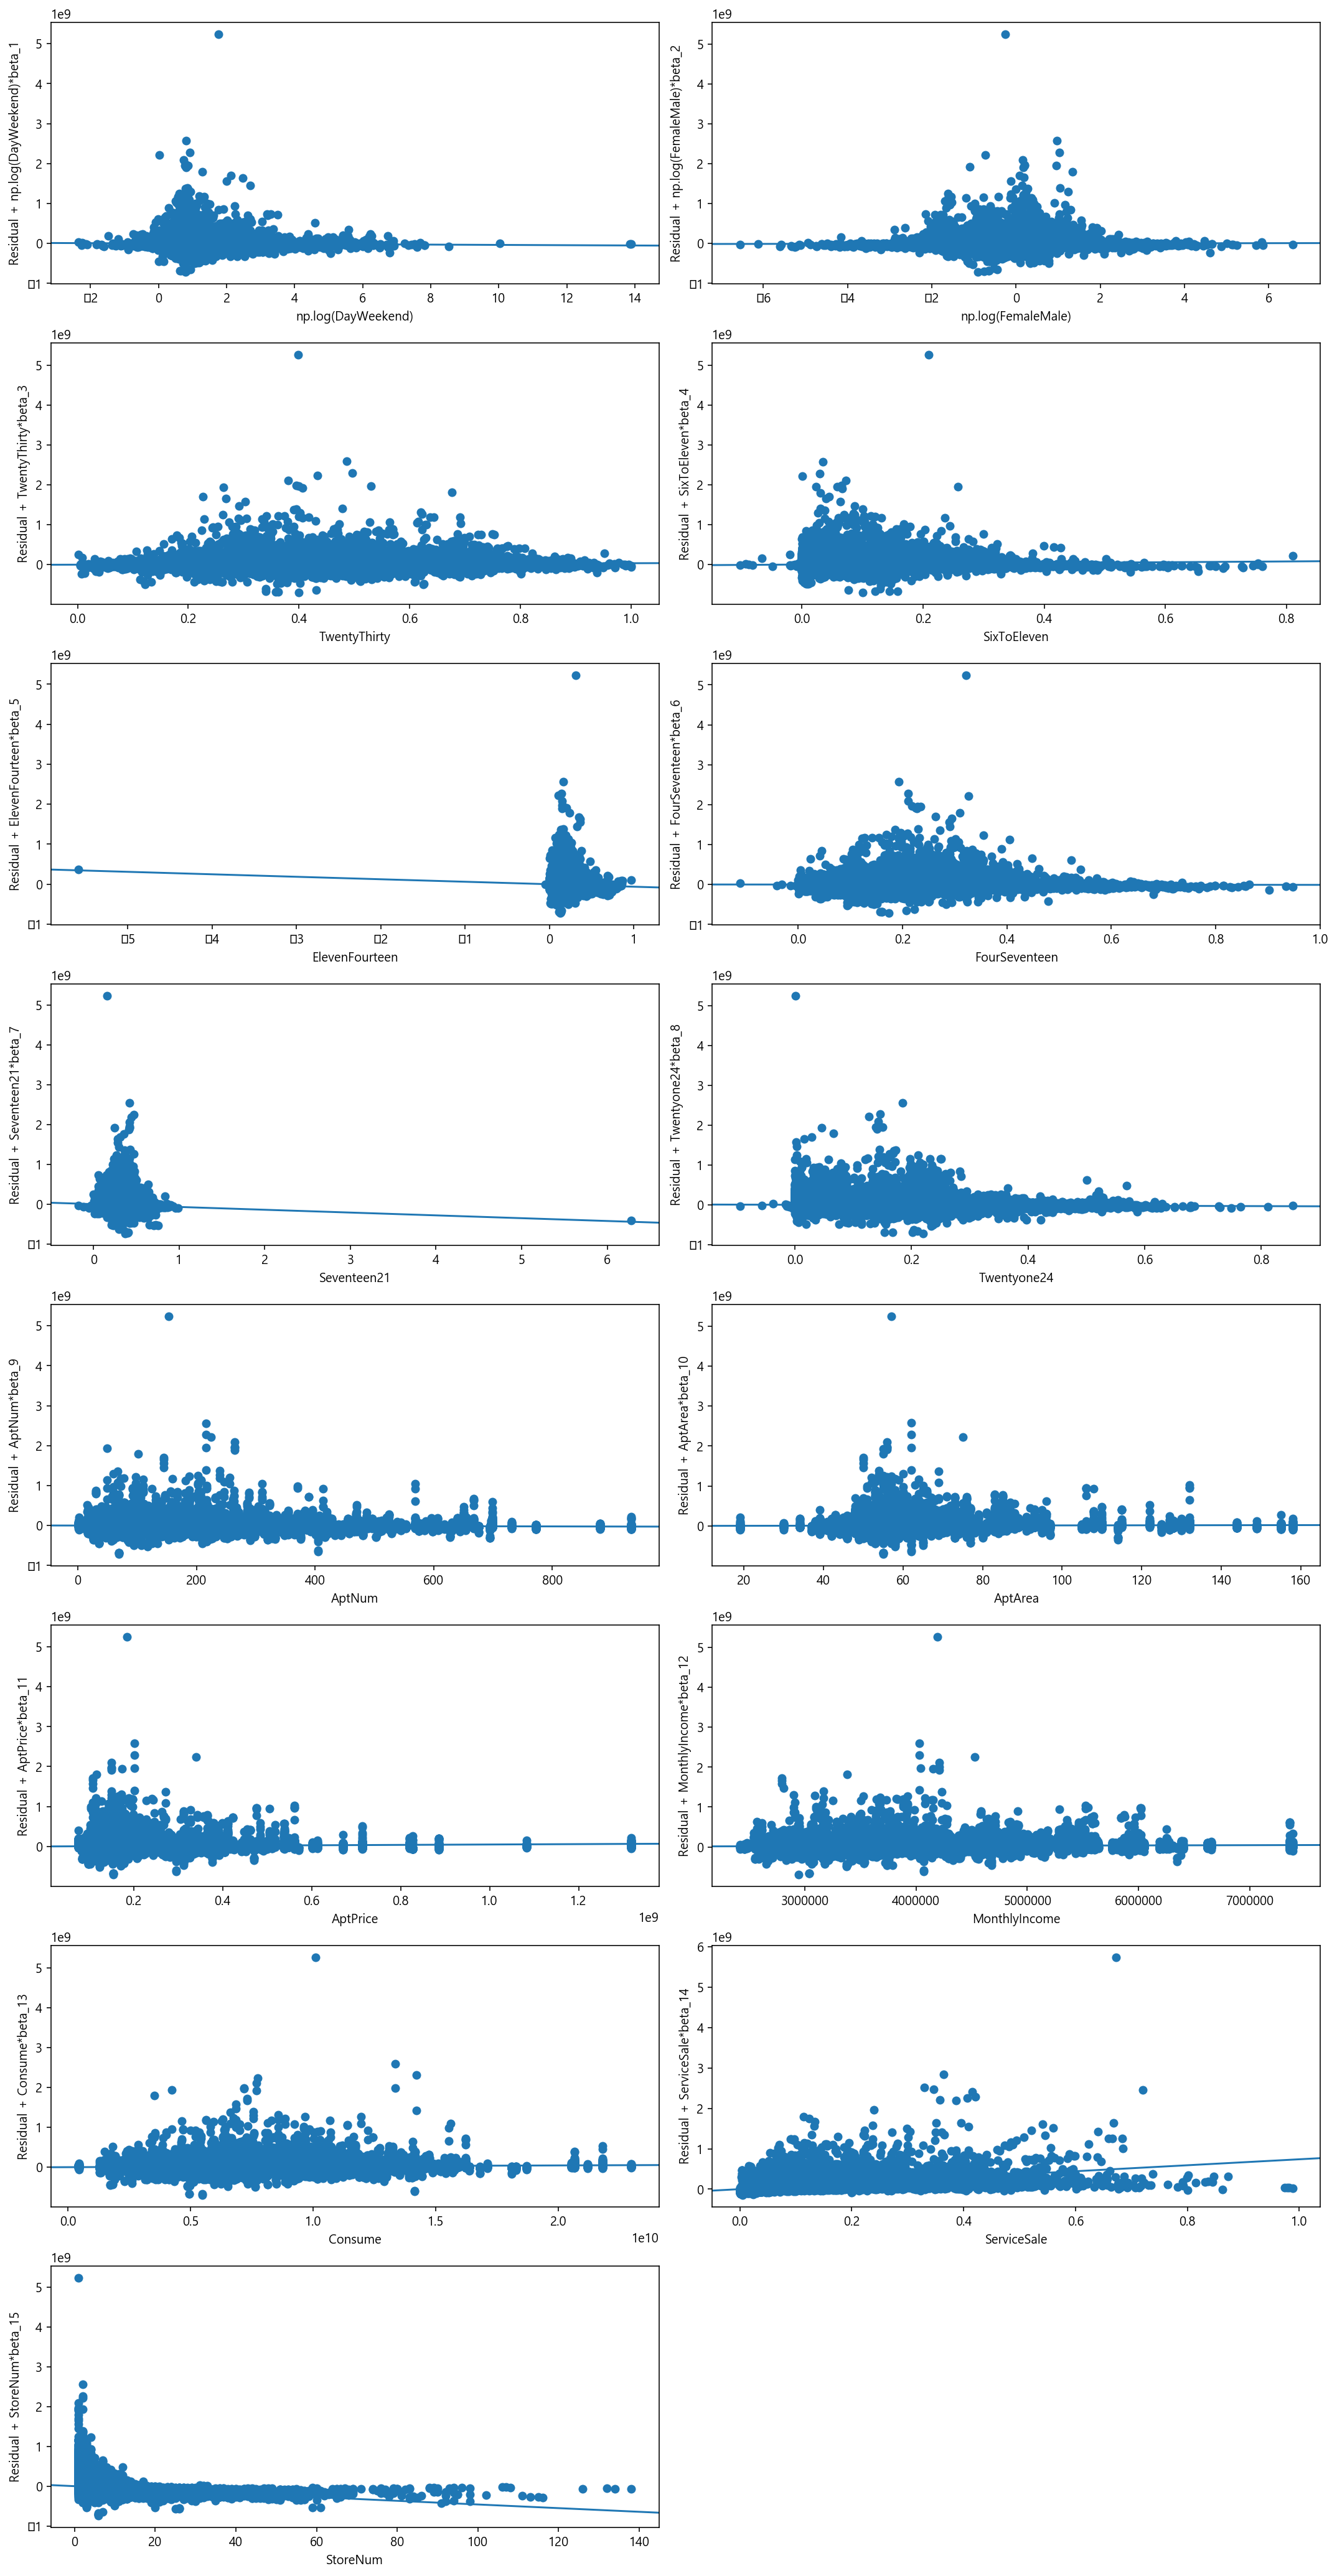

In [308]:
##부분회귀분석 :CCPR플롯으로 표현
# 일부변수에 로그취하니 유의해졌음
fig = plt.figure(figsize=(15, 30))
sm.graphics.plot_ccpr_grid(result, fig=fig)
fig.suptitle("")
plt.show()

In [315]:
# pvalue가 높은 값에 log 취하기
# pvalue를 낮추는데 도움이 되었다
# 하지만 스케일링 문제와 다중공선성 문제 발생
model= sm.OLS.from_formula('SalesPerStore ~ np.log(DayWeekend) + np.log(FemaleMale) + TwentyThirty + SixToEleven + ElevenFourteen\
+np.log( FourSeventeen) \
+ np.log(Seventeen21) + Twentyone24 + AptNum + AptArea + AptPrice + MonthlyIncome + Consume + ServiceSale + StoreNum', data=df1)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          SalesPerStore   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1479.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:58:05   Log-Likelihood:            -9.7854e+05
No. Observations:               49399   AIC:                         1.957e+06
Df Residuals:                   49383   BIC:                         1.957e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.125e+

In [ ]:
# #Robust Scaling 한 후 OLS
# from sklearn.preprocessing import RobustScaler

# dfX=sang_income_nan[sang_income_nan.columns[4:]]
# rb = RobustScaler()
# rb.fit(dfX)
# X_robust_scaled = rb.transform(dfX)
# dfX2=pd.DataFrame(X_robust_scaled, columns= sang_income_nan[sang_income_nan.columns[4:]].columns)
# sang_income_scaled = pd.concat([sang_income_nan[sang_income_nan.columns[[0,2]]], dfX2], axis=1)


# model = sm.OLS.from_formula("당월_매출_금액 ~C(상권_코드)+"+"+".join(sang_income_scaled.columns[2:-2]), data=sang_income_scaled)
# result = model.fit()
# print(result.summary())